# **DIABETES DATASET: VARIOUS PREDICTIVE MODELS**

<span style="font-size: 20px;">Created by *Oleksiy Danilin*</span>

<span style="font-size: 16px;">In this book, we 

### **Preprocessing and Train Split** 

In [2]:
pip install scikit-learn xgboost pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes_ONLY_binary.csv')

# Check the structure of the dataset
print(df.head())

   Diabetes_prevalence  Sex  PoorGenHlth  PoorPhysHlth  PoorMentHlth  \
0                    0    1            0             1             1   
1                    0    1            0             0             0   
2                    0    1            0             1             0   
3                    0    1            0             1             0   
4                    0    0            0             0             0   

   AnyHealthcare  HighBMI  HighBP  HighChol  CholCheck  ...  PhysActivity  \
0              1        1       1         0          1  ...             1   
1              1        1       1         1          1  ...             0   
2              1        1       0         0          1  ...             1   
3              1        1       1         1          1  ...             1   
4              1        1       0         0          1  ...             1   

   DiffWalk  Fruits  Veggies  HvyAlcoholConsump  HighAge  LowIncome  \
0         0       0        1     

In [4]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Diabetes_prevalence', axis=1)
y = df['Diabetes_prevalence']

# Split the dataset into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Logistic Regression Model**

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = model_logreg.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72     10601
           1       0.72      0.74      0.73     10607

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208



### **Random Forest Model**

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.71      0.68      0.70     10601
           1       0.69      0.72      0.71     10607

    accuracy                           0.70     21208
   macro avg       0.70      0.70      0.70     21208
weighted avg       0.70      0.70      0.70     21208



### **Gradient Boosting (XG Boost) Model**

In [9]:
!pip install xgboost

In [7]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model (without use_label_encoder parameter)
model_xgb = XGBClassifier(eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the XGBoost model
from sklearn.metrics import classification_report
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_xgb))

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     10601
           1       0.71      0.77      0.74     10607

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208



### **Results Comparison**

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name}:\n Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate Gradient Boosting
evaluate_model(y_test, y_pred_xgb, "Gradient Boosting")

Logistic Regression:
 Accuracy: 0.7276, Precision: 0.7201, Recall: 0.7449, F1-Score: 0.7323

Random Forest:
 Accuracy: 0.7027, Precision: 0.6942, Recall: 0.7247, F1-Score: 0.7091

Gradient Boosting:
 Accuracy: 0.7268, Precision: 0.7078, Recall: 0.7731, F1-Score: 0.7390



**Logistic Regression** shows the highest accuracy (72.76%), meaning it correctly predicted the diabetes prevalence in about 73% of the cases.
The precision (72.01%) suggests that 72% of the positive diabetes predictions were correct (i.e., when the model predicted a person has diabetes, it was correct 72% of the time).
The recall (74.49%) indicates that out of all actual diabetes cases, it identified 74.49%, making it a strong model for identifying diabetes cases.
The F1-score (73.23%) balances precision and recall, and this score shows a good compromise between predicting correct positives and not missing too many.
Strength: Logistic Regression strikes a balance between predicting positive diabetes cases and minimizing false negatives, making it a well-rounded model.

**Random Forest** has the lowest accuracy (70.27%), indicating it had slightly more incorrect predictions than the other models.
Its precision (69.42%) shows that 69% of the positive predictions were correct, which is lower than Logistic Regression, meaning it had a higher rate of false positives.
The recall (72.47%) is somewhat lower than that of Logistic Regression, meaning it correctly identified fewer actual diabetes cases.
The F1-score (70.91%) suggests that Random Forest's overall balance between precision and recall is weaker compared to the other models.
Strength: Random Forest is generally more robust to overfitting compared to Logistic Regression, but in this case, its performance is slightly lower across the board.

**Gradient Boosting** has an accuracy of 72.68%, which is almost identical to Logistic Regression (72.76%).
Its precision (70.78%) is slightly lower than Logistic Regression, meaning its positive predictions were correct less often.
However, the recall (77.31%) is the highest among all three models, meaning Gradient Boosting is the most effective in identifying diabetes cases (it caught over 77% of true diabetes cases).
The F1-score (73.90%) is also higher than Logistic Regression, indicating that Gradient Boosting balances precision and recall better in this case.
Strength: Gradient Boosting shows a strong ability to capture positive cases of diabetes, with the highest recall, which makes it particularly useful in a scenario where identifying all possible cases is important.

**1) Logistic Regression** performs slightly better in terms of accuracy and precision but lags behind Gradient Boosting in recall. <br> **2) Gradient Boosting** excels at finding more true diabetes cases (highest recall) and has a higher F1-score, making it more reliable for balancing recall and precision. <br> **3) Random Forest** underperforms slightly compared to both Logistic Regression and Gradient Boosting, particularly in precision and F1-score, indicating it might be less effective in predicting diabetes in this dataset.

### **Conclusions**

Each model has its strengths, and the choice should be based on the importance of different metrics (e.g., favoring recall vs precision). <br> 1) If the goal is to maximize recall (i.e., identify the highest number of true diabetes cases), Gradient Boosting is the preferred model. <br> 2) Logistic Regression is good, if a balance between correctly predicting positive cases and minimizing false positives. <br> 3) Random Forest, while robust, seems to underperform relative to the other models on this particular dataset.

### **Identifying Important Predictive Features across Three Models**

**Fit All Models:**
Train each model on the same dataset (X_train, y_train).
For Logistic Regression, look at the model coefficients.
For Random Forest and Gradient Boosting, examine the feature importances directly.

**Extract Feature Importances:**
For Logistic Regression, coefficients represent the impact of each feature.
For Random Forest and Gradient Boosting, feature importance values represent the relative contribution of each feature to the prediction.

**Compare the Feature Importances:**
Normalize the feature importances across the models to compare them side-by-side.
Visualize the comparison using a bar chart or another type of plot for easy comparison.

Interpret the Results:
Compare which factors (features) are considered most important by each model.
Analyze the similarities and differences in the top predictive factors.

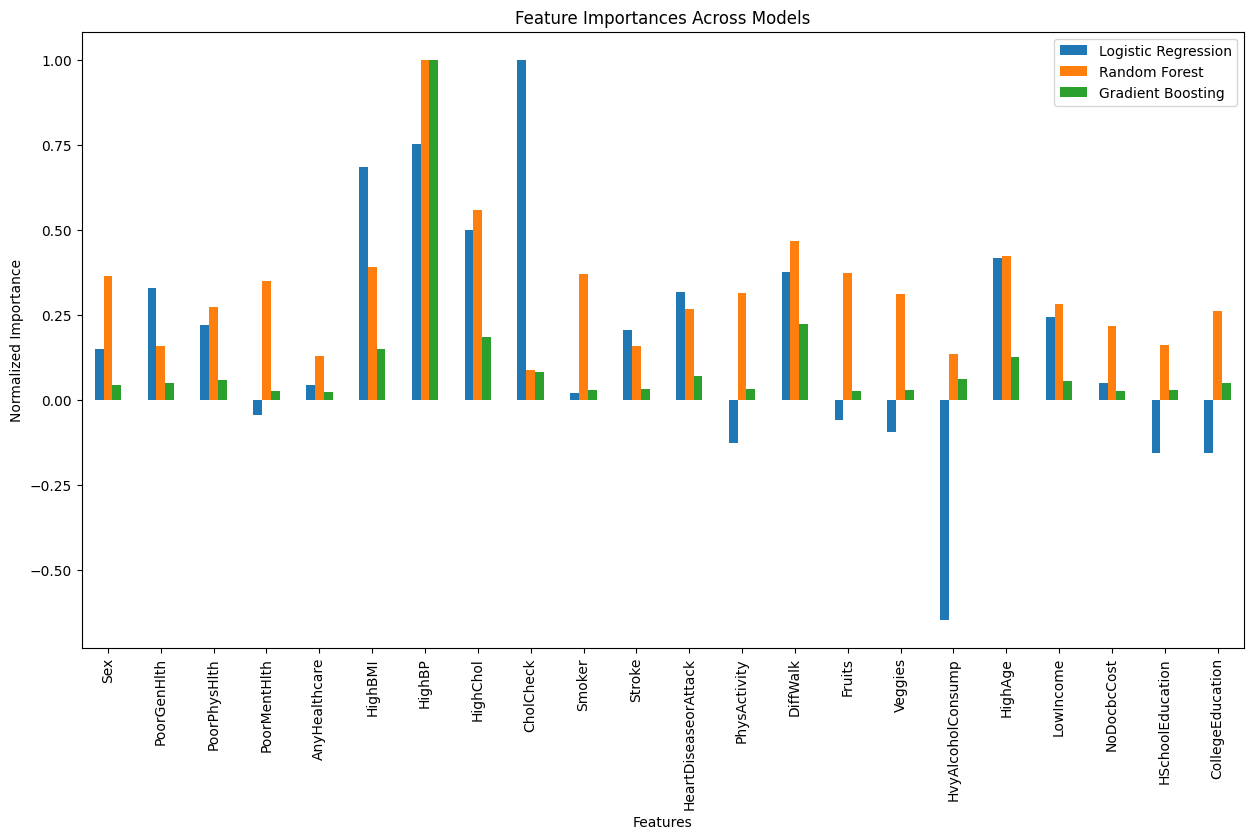

                      Logistic Regression  Random Forest  Gradient Boosting
Sex                              0.149760       0.363279           0.043642
PoorGenHlth                      0.329023       0.157821           0.049915
PoorPhysHlth                     0.219628       0.274228           0.058617
PoorMentHlth                    -0.043529       0.347792           0.026577
AnyHealthcare                    0.043647       0.129042           0.024048
HighBMI                          0.684040       0.389538           0.148450
HighBP                           0.751469       1.000000           1.000000
HighChol                         0.499802       0.559367           0.184139
CholCheck                        1.000000       0.086391           0.081744
Smoker                           0.020813       0.370838           0.027804
Stroke                           0.206244       0.157006           0.031786
HeartDiseaseorAttack             0.318083       0.266040           0.071230
PhysActivity

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Extract Logistic Regression coefficients
log_reg_importance = pd.Series(log_reg.coef_[0], index=X_train.columns)

# Fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Extract Random Forest feature importances
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

# Fit the Gradient Boosting model
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

# Extract Gradient Boosting feature importances
xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns)

# Combine feature importances into a DataFrame for comparison
feature_importances = pd.DataFrame({
    'Logistic Regression': log_reg_importance,
    'Random Forest': rf_importance,
    'Gradient Boosting': xgb_importance
})

# Normalize the feature importances for better comparison
feature_importances = feature_importances / feature_importances.max()

# Plot the feature importances for comparison
feature_importances.plot(kind='bar', figsize=(15, 8))
plt.title('Feature Importances Across Models')
plt.ylabel('Normalized Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

# Optionally, print out the feature importances
print(feature_importances)

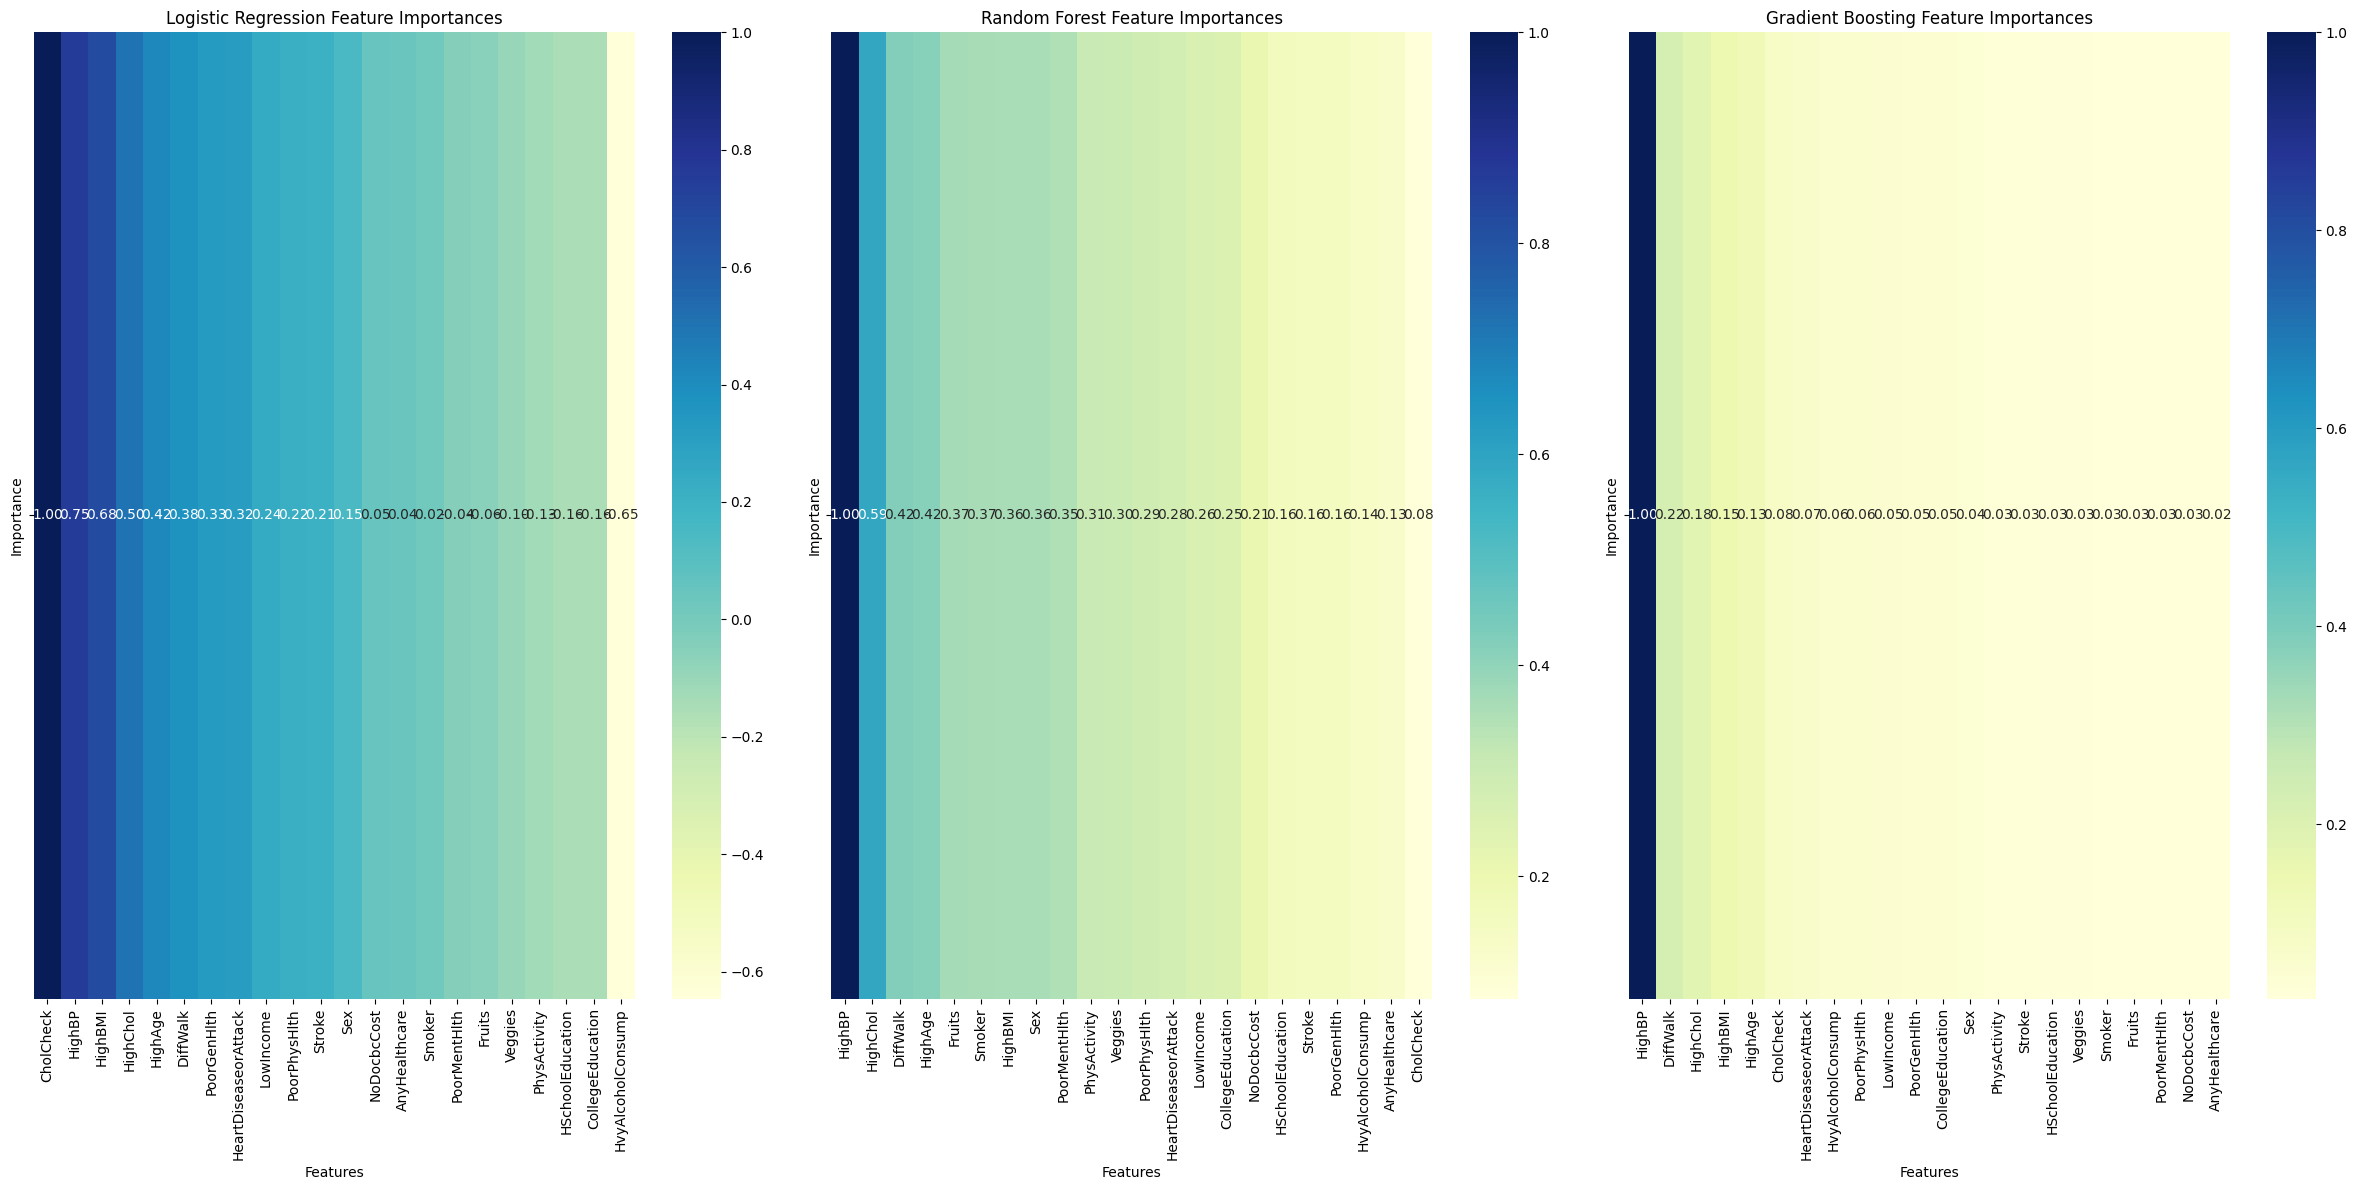

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(24, 12))

# Logistic Regression Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(logistic_df[['Importance']].set_index(logistic_df['Feature']).T, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Logistic Regression Feature Importances')
plt.xlabel('Features')

# Random Forest Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(rf_df[['Importance']].set_index(rf_df['Feature']).T, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')

# Gradient Boosting Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(gb_df[['Importance']].set_index(gb_df['Feature']).T, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Gradient Boosting Feature Importances')
plt.xlabel('Features')

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# Function to categorize importance
def categorize_importance(value):
    if value >= 0.7:
        return 'very important'
    elif value >= 0.4:
        return 'moderately important'
    elif value >= 0:
        return 'somewhat important'
    else:
        return 'not important'

# Logistic Regression coefficients
logistic_importances = {
    'Feature': ['Sex', 'PoorGenHlth', 'PoorPhysHlth', 'PoorMentHlth', 'AnyHealthcare', 
                'HighBMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'DiffWalk', 
                'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HighAge', 
                'LowIncome', 'NoDocbcCost', 'HSchoolEducation', 'CollegeEducation'],
    'Importance': [0.149760, 0.329023, 0.219628, -0.043529, 0.043647, 
                   0.684040, 0.751469, 0.499802, 1.000000, 0.020813, 
                   0.206244, 0.318083, -0.125876, 0.376121, -0.057932, 
                   -0.095154, -0.646015, 0.417751, 0.244092, 0.050174, 
                   -0.156025, -0.156391]
}
logistic_df = pd.DataFrame(logistic_importances)

# Adding importance labels to Logistic Regression
logistic_df['Importance_Label'] = logistic_df['Importance'].apply(categorize_importance)

# Sorting Logistic Regression DataFrame by Importance
logistic_df = logistic_df.sort_values(by='Importance', ascending=False)

# Random Forest importances
rf_importances = {
    'Feature': ['Sex', 'PoorGenHlth', 'PoorPhysHlth', 'PoorMentHlth', 'AnyHealthcare', 
                'HighBMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'DiffWalk', 
                'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HighAge', 
                'LowIncome', 'NoDocbcCost', 'HSchoolEducation', 'CollegeEducation'],
    'Importance': [0.361049, 0.158249, 0.289487, 0.349085, 0.129426, 
                   0.362945, 1.000000, 0.586979, 0.084074, 0.366249, 
                   0.159188, 0.279291, 0.307066, 0.421827, 0.368821, 
                   0.300111, 0.136137, 0.416797, 0.261591, 0.210966, 
                   0.162806, 0.254466]
}
rf_df = pd.DataFrame(rf_importances)

# Adding importance labels to Random Forest
rf_df['Importance_Label'] = rf_df['Importance'].apply(categorize_importance)

# Sorting Random Forest DataFrame by Importance
rf_df = rf_df.sort_values(by='Importance', ascending=False)

# Gradient Boosting importances
gb_importances = {
    'Feature': ['Sex', 'PoorGenHlth', 'PoorPhysHlth', 'PoorMentHlth', 'AnyHealthcare', 
                'HighBMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'DiffWalk', 
                'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HighAge', 
                'LowIncome', 'NoDocbcCost', 'HSchoolEducation', 'CollegeEducation'],
    'Importance': [0.043642, 0.049915, 0.058617, 0.026577, 0.024048, 
                   0.148450, 1.000000, 0.184139, 0.081744, 0.027804, 
                   0.031786, 0.071230, 0.032127, 0.223696, 0.026956, 
                   0.028325, 0.061815, 0.127063, 0.054511, 0.025361, 
                   0.029693, 0.048323]
}
gb_df = pd.DataFrame(gb_importances)

# Adding importance labels to Gradient Boosting
gb_df['Importance_Label'] = gb_df['Importance'].apply(categorize_importance)

# Sorting Gradient Boosting DataFrame by Importance
gb_df = gb_df.sort_values(by='Importance', ascending=False)

# Display the results for all features
print("Logistic Regression Feature Importances:")
print(logistic_df)

print("\nRandom Forest Feature Importances:")
print(rf_df)

print("\nGradient Boosting Feature Importances:")
print(gb_df)

Logistic Regression Feature Importances:
                 Feature  Importance      Importance_Label
8              CholCheck    1.000000        very important
6                 HighBP    0.751469        very important
5                HighBMI    0.684040  moderately important
7               HighChol    0.499802  moderately important
17               HighAge    0.417751  moderately important
13              DiffWalk    0.376121    somewhat important
1            PoorGenHlth    0.329023    somewhat important
11  HeartDiseaseorAttack    0.318083    somewhat important
18             LowIncome    0.244092    somewhat important
2           PoorPhysHlth    0.219628    somewhat important
10                Stroke    0.206244    somewhat important
0                    Sex    0.149760    somewhat important
19           NoDocbcCost    0.050174    somewhat important
4          AnyHealthcare    0.043647    somewhat important
9                 Smoker    0.020813    somewhat important
3           Poo

### **General Conclusions**

High Blood Pressure is universally recognized as a critical risk factor for diabetes across all models. High BMI and poor health indicators (like Poor General and Physical Health) also rank highly, particularly in Logistic Regression. Age and socioeconomic factors (like Low Income) maintain moderate importance, indicating that these variables contribute to the risk of diabetes but may interact with other factors in complex ways.

The consistent prominence of high blood pressure underscores the need for targeted interventions focused on hypertension management as part of diabetes prevention strategies. Additionally, the strong association of high BMI highlights the importance of promoting healthy weight management and lifestyle changes.

The moderate significance of age suggests that older adults may require tailored healthcare approaches to address their unique risks. Furthermore, socioeconomic factors like low income may impact access to healthcare resources, which can indirectly influence diabetes prevalence. This emphasizes the need for comprehensive health policies that address not only medical care but also social determinants of health.

Overall, these findings suggest a multifaceted approach to diabetes risk reduction that incorporates both medical and social strategies, targeting key health indicators and considering the broader context of individuals' lives. By focusing on these critical areas, healthcare providers and policymakers can better design interventions that effectively mitigate the risk of diabetes in diverse populations.

### **Nature of the Models**

Logistic Regression:
As a linear model, Logistic Regression assumes a linear relationship between the features and the log-odds of the outcome. This model is sensitive to multicollinearity and can produce stark differences in feature importance. Features that have a strong relationship with the outcome will have significant coefficients, while others might yield coefficients close to zero (or negative), indicating they do not contribute much to predicting the target variable. This results in a wide range of importance scores from very important to not important at all.

Random Forest and Gradient Boosting:
Both Random Forest and Gradient Boosting are ensemble methods that combine multiple decision trees. These models tend to capture non-linear relationships and interactions between features. They may assign importance more evenly across features because they can leverage many different paths to make predictions. Consequently, even features that do not individually contribute significantly to the prediction can still be included as part of a broader ensemble, leading to more uniform importance scores.

Ensemble models like Random Forest and Gradient Boosting consider interactions between features more effectively. A feature that may not have a strong individual effect might still contribute positively when interacting with others. As a result, the feature importance scores for these models can appear less extreme because they incorporate these interactions.

### **Complexity and Interpretability**

Logistic Regression:
Provides straightforward interpretability as it directly correlates changes in feature values with changes in the predicted probability. The resulting coefficients give clear indications of how much each feature affects the outcome, leading to a broader range of importance scores.

Random Forest and Gradient Boosting:
These models are more complex and may not provide as interpretable results regarding individual feature contributions. They aggregate many weak learners, which often leads to more moderate feature importance scores. The feature importance metrics they provide can reflect the average effect across many splits rather than a direct influence.

Logistic Regression is sensitive to the scale of features, so standardizing or normalizing features can lead to clearer distinctions in importance. In contrast, tree-based models are not affected by feature scaling in the same way since they rely on threshold splits rather than distance metrics.

In summary, the contrasting feature importance observed in Logistic Regression compared to Random Forest and Gradient Boosting can be attributed to the linear nature of Logistic Regression, its sensitivity to feature relationships, and the way tree-based models capture more complex interactions. This results in a more nuanced and less extreme representation of feature importance in the latter models.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes_ONLY_binary.csv')

# Logistic Regression feature importance (coefficients) dictionary based on your results
logistic_regression_coeffs = {
    'Sex': 0.149760,
    'HighAge': 0.417751,
    'PoorGenHlth': 0.329023,
    'PoorPhysHlth': 0.219628,
    'PoorMentHlth': -0.043529,
    'AnyHealthCare': 0.043647,
    'HighBMI': 0.684040,
    'HighBP': 0.751469,
    'HighChol': 0.499802,
    'CholCheck': 1.000000,
    'Stroke': 0.206244,
    'HeartDiseaseorAttack': 0.318083,
    'Smoker': 0.020813,
    'PhysActivity': -0.125876,
    'DiffWalk': 0.376121,
    'Fruits': -0.057932,
    'Veggies': -0.095154,
    'HvyAlcoholConsump': -0.646015,
    'LowIncome': 0.244092,
    'NoDocbcCost': 0.050174,
    'HSchoolEducation': -0.156025,
    'CollegeEducation': -0.156391
}

# Group the features into their respective categories
demographic_features = ['Sex', 'HighAge']
healthcare_features = ['PoorGenHlth', 'PoorPhysHlth', 'PoorMentHlth', 'AnyHealthCare', 'HighBMI', 'HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack']
lifestyle_features = ['Smoker', 'PhysActivity', 'DiffWalk', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
socioeconomic_features = ['LowIncome', 'NoDocbcCost', 'HSchoolEducation', 'CollegeEducation']

# Function to calculate integral index for each group
def calculate_integral_index(features, coeff_dict):
    total_importance = 0
    for feature in features:
        total_importance += abs(coeff_dict[feature])  # Use absolute values to avoid cancellation of positive and negative coefficients
    return total_importance

# Calculate integral index for each feature group
demographic_importance = calculate_integral_index(demographic_features, logistic_regression_coeffs)
healthcare_importance = calculate_integral_index(healthcare_features, logistic_regression_coeffs)
lifestyle_importance = calculate_integral_index(lifestyle_features, logistic_regression_coeffs)
socioeconomic_importance = calculate_integral_index(socioeconomic_features, logistic_regression_coeffs)

# Create a dataframe for the results
integral_indices_df = pd.DataFrame({
    'Feature Group': ['Demographic', 'Healthcare', 'Lifestyle', 'Socioeconomic'],
    'Integral Index': [demographic_importance, healthcare_importance, lifestyle_importance, socioeconomic_importance]
})

# Display the results
print(integral_indices_df)

   Feature Group  Integral Index
0    Demographic        0.567511
1     Healthcare        4.095465
2      Lifestyle        1.321911
3  Socioeconomic        0.606682


In [8]:
import pandas as pd

# Provided feature importance values
feature_importances = {
    "Demographic": {
        "Sex": 0.149760,
        "HighAge": 0.417751
    },
    "Healthcare": {
        "PoorGenHlth": 0.329023,
        "PoorPhysHlth": 0.219628,
        "PoorMentHlth": -0.043529,
        "AnyHealthCare": 0.043647,
        "HighBMI": 0.684040,
        "HighBP": 0.751469,
        "HighChol": 0.499802,
        "CholCheck": 1.000000,
        "Stroke": 0.206244,
        "HeartDiseaseorAttack": 0.318083
    },
    "Lifestyle": {
        "Smoker": 0.020813,
        "PhysActivity": -0.125876,
        "DiffWalk": 0.376121,
        "Fruits": -0.057932,
        "Veggies": -0.095154,
        "HvyAlcoholConsump": -0.646015
    },
    "Socioeconomic": {
        "LowIncome": 0.244092,
        "NoDocbcCost": 0.050174,
        "HSchoolEducation": -0.156025,
        "CollegeEducation": -0.156391
    }
}

# Step 1: Calculate total importance for each group
grouped_importance = {}
for group, features in feature_importances.items():
    grouped_importance[group] = sum(abs(importance) for importance in features.values())  # Sum of absolute values

# Step 2: Calculate percentage share and weighted contribution for each feature
grouped_weighted_indices = []
for group, features in feature_importances.items():
    total_importance = grouped_importance[group]
    for feature, importance in features.items():
        # Percentage share of this feature in its group (absolute importance to avoid negative percentages)
        feature_share = (abs(importance) / total_importance) if total_importance != 0 else 0
        weighted_value = importance * feature_share  # Weighted contribution
        grouped_weighted_indices.append([group, feature, importance, feature_share * 100, weighted_value])

# Create DataFrame for display
weighted_indices_df = pd.DataFrame(grouped_weighted_indices, columns=["Feature Group", "Feature", "Importance", "Percentage Share", "Weighted Contribution"])
print(weighted_indices_df)

# Step 3: Calculate the total weighted average for each group
grouped_weighted_avg = weighted_indices_df.groupby("Feature Group")["Weighted Contribution"].sum()
print("\nWeighted average for each group:")
print(grouped_weighted_avg)

    Feature Group               Feature  Importance  Percentage Share  \
0     Demographic                   Sex    0.149760         26.388916   
1     Demographic               HighAge    0.417751         73.611084   
2      Healthcare           PoorGenHlth    0.329023          8.033837   
3      Healthcare          PoorPhysHlth    0.219628          5.362712   
4      Healthcare          PoorMentHlth   -0.043529          1.062859   
5      Healthcare         AnyHealthCare    0.043647          1.065740   
6      Healthcare               HighBMI    0.684040         16.702377   
7      Healthcare                HighBP    0.751469         18.348808   
8      Healthcare              HighChol    0.499802         12.203791   
9      Healthcare             CholCheck    1.000000         24.417252   
10     Healthcare                Stroke    0.206244          5.035912   
11     Healthcare  HeartDiseaseorAttack    0.318083          7.766713   
12      Lifestyle                Smoker    0.020813